In [8]:
using LinearAlgebra, ApproxFun, SemiclassicalOrthogonalPolynomials, Plots, Test

On the teardrop curve

$$
\gamma = \left\lbrace (x,y): y^2 = \phi(x) := \frac{1}{4}(1 - x)^2(1+x), \: -1 \leq x \leq 1\right\rbrace,
$$

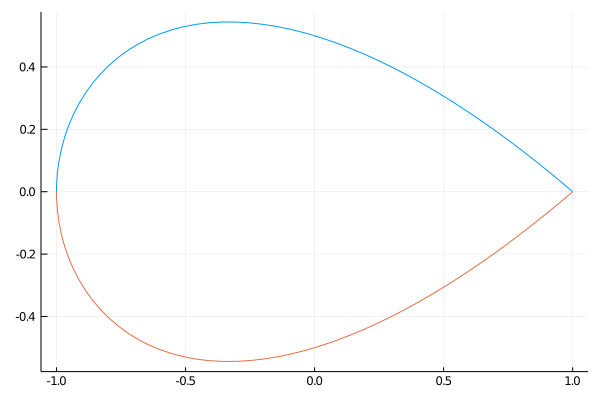

In [9]:
x = Fun(identity,-1..1)
y=(1/2*(1-x))*sqrt(1+x)
plot(y);plot!(-y;legend=false)

we have the OP basis

$$
\mathcal{B}_0 = \lbrace 1 \rbrace, \qquad \mathcal{B}_1 = \left\lbrace P_{1}^{(\alpha, \beta)}, y \right\rbrace,
$$

$$
\mathcal{B}_{2m} = \left\lbrace P^{(\alpha, \beta)}_{3m}, P^{(\alpha, \beta)}_{3m-1}, yP^{(\alpha+2, \beta+1)}_{3m-2}   \right\rbrace, \qquad m \geq 1,
$$

$$
\mathcal{B}_{2m+1} = \left\lbrace P^{(\alpha, \beta)}_{3m+1}, yP^{(\alpha+2, \beta+1)}_{3m}, yP^{(\alpha+2, \beta+1)}_{3m-2}   \right\rbrace, \qquad m \geq 1.
$$

The inner product on the curve is

$$
\langle f,g \rangle = \int_{-1}^{1}\left[fg\left(x,\sqrt{\phi(x)}\right) + fg\left(x,-\sqrt{\phi(x)}\right)   \right]w_{\alpha,\beta}(x)\mathrm{d}x, \qquad w_{\alpha,\beta}(x) = (1-x)^{\alpha}(1+x)^{\beta}.
$$

Here we just consider $\alpha = \beta = -1/2$.

In [10]:
α = -1/2
β = -1/2
w = 2(1-x)^α*(1+x)^β
w2 = 1/2*(1-x)^(α+2)*(1+x)^(β+1)
ip(f,g) = sum(f*g*w)
nor(f) = sqrt(ip(f,f))
n = 1000
P,~,~ = @time lanczos(w,n)
P2,~,~ = @time lanczos(w2,n);

 16.064090 seconds (314.46 k allocations: 5.188 GiB, 8.02% gc time)
 11.679974 seconds (316.46 k allocations: 5.203 GiB, 7.94% gc time)


Let the vectors of the orthonormal versions of $\mathcal{B}_k$ be denoted by $Q_k$, then the matrix recurrence coefficients are

$$
x Q_n = B^{\intercal}_{n-1,1}Q_{n-1} + A_{n,1}Q_n + B_{n,1}Q_{n+1},
$$

$$
y Q_n = B^{\intercal}_{n-1,2}Q_{n-1} + A_{n,2}Q_n + B_{n,2}Q_{n+1}.
$$

For $m \geq1$,

$$
A_{2m,1} = \langle xQ_{2m}, Q_{2m}^{\intercal}\rangle = 
\left[ 
\begin{array}{c c c}
\left\langle x\frac{P_{3m}^{(\alpha,\beta)}}{\| P_{3m}^{(\alpha,\beta)} \|},\frac{P_{3m}^{(\alpha,\beta)}}{\| P_{3m}^{(\alpha,\beta)} \|}   \right\rangle & \left\langle x\frac{P_{3m}^{(\alpha,\beta)}}{\| P_{3m}^{(\alpha,\beta)} \|},\frac{P_{3m-1}^{(\alpha,\beta)}}{\| P_{3m-1}^{(\alpha,\beta)} \|}   \right\rangle & 0\\
\left\langle x\frac{P_{3m-1}^{(\alpha,\beta)}}{\| P_{3m-1}^{(\alpha,\beta)} \|},\frac{P_{3m}^{(\alpha,\beta)}}{\| P_{3m}^{(\alpha,\beta)} \|}   \right\rangle & \left\langle x\frac{P_{3m-1}^{(\alpha,\beta)}}{\| P_{3m-1}^{(\alpha,\beta)} \|},\frac{P_{3m-1}^{(\alpha,\beta)}}{\| P_{3m-1}^{(\alpha,\beta)} \|}   \right\rangle & 0 \\
  0   &  0    & \left\langle x\frac{yP_{3m-2}^{(\alpha+2,\beta+1)}}{\| y P_{3m-2}^{(\alpha+2,\beta+1)} \|},\frac{yP_{3m-2}^{(\alpha+2,\beta+1)}}{\| yP_{3m-2}^{(\alpha+2,\beta+1)} \|}   \right\rangle
\end{array}
\right], 
$$

$$
\qquad A_{2m,2}= \langle yQ_{2m}, Q_{2m}^{\intercal}\rangle = \left[ 
\begin{array}{c c c}
0 & 0 & \left\langle y\frac{P_{3m}^{(\alpha,\beta)}}{\| P_{3m}^{(\alpha,\beta)} \|},\frac{yP_{3m-2}^{(\alpha+2,\beta+1)}}{\| yP_{3m-2}^{(\alpha+2,\beta+1)} \|}   \right\rangle \\
0 & 0 & \left\langle y\frac{P_{3m-1}^{(\alpha,\beta)}}{\| P_{3m-1}^{(\alpha,\beta)} \|},\frac{yP_{3m-2}^{(\alpha+2,\beta+1)}}{\| yP_{3m-2}^{(\alpha+2,\beta+1)} \|}   \right\rangle \\
\left\langle y\frac{P_{3m}^{(\alpha,\beta)}}{\| P_{3m}^{(\alpha,\beta)} \|},\frac{yP_{3m-2}^{(\alpha+2,\beta+1)}}{\| yP_{3m-2}^{(\alpha+2,\beta+1)} \|}   \right\rangle &  \left\langle y\frac{P_{3m-1}^{(\alpha,\beta)}}{\| P_{3m-1}^{(\alpha,\beta)} \|},\frac{yP_{3m-2}^{(\alpha+2,\beta+1)}}{\| yP_{3m-2}^{(\alpha+2,\beta+1)} \|}   \right\rangle & 0
\end{array}
\right].
$$

Here are $A_{600,1}$ and $A_{600,2}$:

In [12]:
k = 300
a11 = ip(x*P[1+3*k],P[1+3*k])
a12 = ip(x*P[1+3*k],P[3*k])
a22 = ip(x*P[3*k],P[3*k])
a33 = ip(x*y*P2[3*k-1],y*P2[3*k-1])
A2kx = [a11 a12 0;
            a12 a22 0;
             0 0   a33] 

3×3 Array{Float64,2}:
 -1.29682e-17   0.5           0.0
  0.5          -8.33213e-18   0.0
  0.0           0.0          -6.31957e-7

In [14]:
a13 = ip(y*P[3*k+1],y*P2[3*k-1])
a23 = ip(y*P[3*k],y*P2[3*k-1])
A2ky = [0 0 a13;
            0 0 a23;
        a13 a23 0]

3×3 Array{Float64,2}:
  0.0        0.0       -0.176875
  0.0        0.0       -0.176678
 -0.176875  -0.176678   0.0

Let $A_{e,i}:= \lim_{m \to \infty} A_{2m,i}, i =1,2$, then $A_{e,1}$ and $A_{e,2}$ are

In [15]:
Ae1 = [0 1/2 0;1/2 0 0;0 0 0]

3×3 Array{Float64,2}:
 0.0  0.5  0.0
 0.5  0.0  0.0
 0.0  0.0  0.0

In [16]:
v = 1/(4*sqrt(2))
Ae2 = [0 0 -v;0 0 -v;-v -v 0]

3×3 Array{Float64,2}:
  0.0        0.0       -0.176777
  0.0        0.0       -0.176777
 -0.176777  -0.176777   0.0

$$
\qquad B_{2m,1}= \langle xQ_{2m}, Q_{2m+1}^{\intercal}\rangle = \left[ 
\begin{array}{c c c}
\left\langle x\frac{P_{3m}^{(\alpha,\beta)}}{\| P_{3m}^{(\alpha,\beta)} \|},\frac{P_{3m+1}^{(\alpha,\beta)}}{\| P_{3m+1}^{(\alpha,\beta)} \|}   \right\rangle & 0 & 0 \\
0 & 0 & 0 \\
0 &  0 & \left\langle x\frac{yP_{3m-2}^{(\alpha+2,\beta+1)}}{\|y P_{3m-2}^{(\alpha+2,\beta+1)} \|},\frac{yP_{3m-1}^{(\alpha+2,\beta+1)}}{\| yP_{3m-1}^{(\alpha+2,\beta+1)} \|}   \right\rangle
\end{array}
\right],
$$

$$
\qquad B_{2m,2}= \langle yQ_{2m}, Q_{2m+1}^{\intercal}\rangle = \left[ 
\begin{array}{c c c}
0 & \left\langle y\frac{P_{3m}^{(\alpha,\beta)}}{\| P_{3m}^{(\alpha,\beta)} \|},\frac{yP_{3m}^{(\alpha+2,\beta+1)}}{\| yP_{3m}^{(\alpha+2,\beta+1)} \|}   \right\rangle & \left\langle y\frac{P_{3m}^{(\alpha,\beta)}}{\| P_{3m}^{(\alpha,\beta)} \|},\frac{yP_{3m-1}^{(\alpha+2,\beta+1)}}{\| yP_{3m-1}^{(\alpha+2,\beta+1)} \|}   \right\rangle \\
0 & 0 & \left\langle y\frac{P_{3m-1}^{(\alpha,\beta)}}{\| P_{3m-1}^{(\alpha,\beta)} \|},\frac{yP_{3m-1}^{(\alpha+2,\beta+1)}}{\| yP_{3m-1}^{(\alpha+2,\beta+1)} \|}   \right\rangle\\
\left\langle y\frac{yP_{3m-2}^{(\alpha+2,\beta+1)}}{\|y P_{3m-2}^{(\alpha+2,\beta+1)} \|},\frac{P_{3m+1}^{(\alpha,\beta)}}{\| P_{3m+1}^{(\alpha,\beta)} \|}   \right\rangle &  0 & 0
\end{array}
\right],
$$

$B_{600,1}$ and $B_{600,2}$:

In [17]:
    b11 = ip(x*P[1+3*k],P[2+3*k])
    b33 = ip(x*y*P2[3*k-1],y*P2[3*k])
    B2kx = [b11 0 0;
            0 0 0;
            0 0 b33] 

3×3 Array{Float64,2}:
 0.5  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.5

In [18]:
    b12 = ip(y*P[3*k+1],y*P2[3*k+1])
    b13 = ip(y*P[3*k+1],y*P2[3*k])
    b23 = ip(y*P[3*k],  y*P2[3*k])
    b31 = ip(y*y*P2[3*k-1],P[3*k+2])
    B2ky = [0 b12 b13;
            0  0  b23;
            b31  0    0]

3×3 Array{Float64,2}:
 0.0       0.176875  -0.176679
 0.0       0.0        0.176875
 0.176678  0.0        0.0

Let $B_{e,i}:= \lim_{m \to \infty} B_{2m,i}, i =1,2$, then $B_{e,1}$ and $B_{e,2}$ are

In [19]:
Be1 = [1/2 0 0;0 0 0;0 0 1/2]

3×3 Array{Float64,2}:
 0.5  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.5

In [20]:
Be2 = [0 v -v;0 0 v;v 0 0]

3×3 Array{Float64,2}:
 0.0       0.176777  -0.176777
 0.0       0.0        0.176777
 0.176777  0.0        0.0


$$
A_{2m+1,1} = \langle xQ_{2m+1}, Q_{2m+1}^{\intercal}\rangle = 
\left[ 
\begin{array}{c c c}
\left\langle x\frac{P_{3m+1}^{(\alpha,\beta)}}{\| P_{3m+1}^{(\alpha,\beta)} \|},\frac{P_{3m+1}^{(\alpha,\beta)}}{\| P_{3m+1}^{(\alpha,\beta)} \|}   \right\rangle & 0 & 0\\
0 & \left\langle x\frac{yP_{3m}^{(\alpha+2,\beta+1)}}{\| yP_{3m}^{(\alpha+2,\beta+1)} \|},\frac{yP_{3m}^{(\alpha+2,\beta+1)}}{\| yP_{3m}^{(\alpha+2,\beta+1)} \|}   \right\rangle & \left\langle x\frac{yP_{3m}^{(\alpha+2,\beta+1)}}{\| yP_{3m}^{(\alpha+2,\beta+1)} \|},\frac{yP_{3m-1}^{(\alpha+2,\beta+1)}}{\| yP_{3m-1}^{(\alpha+2,\beta+1)} \|}   \right\rangle \\
  0   &  \left\langle x\frac{yP_{3m}^{(\alpha+2,\beta+1)}}{\| yP_{3m}^{(\alpha+2,\beta+1)} \|},\frac{yP_{3m-1}^{(\alpha+2,\beta+1)}}{\| yP_{3m-1}^{(\alpha+2,\beta+1)} \|}   \right\rangle    & \left\langle x\frac{yP_{3m-1}^{(\alpha+2,\beta+1)}}{\| y P_{3m-1}^{(\alpha+2,\beta+1)} \|},\frac{yP_{3m-1}^{(\alpha+2,\beta+1)}}{\| yP_{3m-1}^{(\alpha+2,\beta+1)} \|}   \right\rangle
\end{array}
\right], 
$$

$$
\qquad A_{2m+1,2}= \langle yQ_{2m+1}, Q_{2m+1}^{\intercal}\rangle = \left[ 
\begin{array}{c c c}
0 & \left\langle y\frac{P_{3m+1}^{(\alpha,\beta)}}{\| P_{3m+1}^{(\alpha,\beta)} \|},\frac{yP_{3m}^{(\alpha+2,\beta+1)}}{\| yP_{3m}^{(\alpha+2,\beta+1)} \|}   \right\rangle & \left\langle y\frac{P_{3m+1}^{(\alpha,\beta)}}{\| P_{3m+1}^{(\alpha,\beta)} \|},\frac{yP_{3m-1}^{(\alpha+2,\beta+1)}}{\| yP_{3m-1}^{(\alpha+2,\beta+1)} \|}   \right\rangle \\
\left\langle y\frac{P_{3m+1}^{(\alpha,\beta)}}{\| P_{3m+1}^{(\alpha,\beta)} \|},\frac{yP_{3m}^{(\alpha+2,\beta+1)}}{\| yP_{3m}^{(\alpha+2,\beta+1)} \|}   \right\rangle & 0 & 0 \\
\left\langle y\frac{P_{3m+1}^{(\alpha,\beta)}}{\| P_{3m+1}^{(\alpha,\beta)} \|},\frac{yP_{3m-1}^{(\alpha+2,\beta+1)}}{\| yP_{3m-1}^{(\alpha+2,\beta+1)} \|}   \right\rangle &  0 & 0
\end{array}
\right],
$$

$A_{601,1}$ and $A_{601,2}$:

In [21]:
    a11 = ip(x*P[2+3*k],P[2+3*k])
    a22 = ip(x*y*P2[1+3*k],y*P2[1+3*k])
    a23 = ip(x*y*P2[1+3*k],y*P2[3*k])
    a33 = ip(x*y*P2[3*k],y*P2[3*k])
    A2k1x = [a11 0  0;
            0  a22 a23;
            0  a23 a33]

3×3 Array{Float64,2}:
 -2.90011e-18   0.0          0.0
  0.0          -6.02412e-7   0.5
  0.0           0.5         -6.29729e-7

In [22]:
    a12 = ip(y*P[3*k+2],y*P2[3*k+1])
    a13 = ip(y*P[3*k+2],y*P2[3*k])
    A2k1y = [0 a12 a13;
             a12 0 0;
             a13 0 0]

3×3 Array{Float64,2}:
  0.0       -0.176679  -0.176875
 -0.176679   0.0        0.0
 -0.176875   0.0        0.0

Let $A_{o,i}:= \lim_{m \to \infty} A_{2m+1,i}, i =1,2$, then $A_{o,1}$ and $A_{o,2}$ are

In [23]:
Ao1 = [0 0 0;0 0 1/2;0 1/2 0]

3×3 Array{Float64,2}:
 0.0  0.0  0.0
 0.0  0.0  0.5
 0.0  0.5  0.0

In [24]:
Ao2 = [0 -v -v;-v 0 0;-v 0 0]

3×3 Array{Float64,2}:
  0.0       -0.176777  -0.176777
 -0.176777   0.0        0.0
 -0.176777   0.0        0.0


$$
\qquad B_{2m+1,1}= \langle xQ_{2m+1}, Q_{2m+2}^{\intercal}\rangle = \left[ 
\begin{array}{c c c}
0 & \left\langle x\frac{P_{3m+1}^{(\alpha,\beta)}}{\| P_{3m+1}^{(\alpha,\beta)} \|},\frac{P_{3m+2}^{(\alpha,\beta)}}{\| P_{3m+2}^{(\alpha,\beta)} \|}   \right\rangle  & 0 \\
0 & 0 & \left\langle x\frac{yP_{3m}^{(\alpha+2,\beta+1)}}{\|y P_{3m}^{(\alpha+2,\beta+1)} \|},\frac{yP_{3m+1}^{(\alpha+2,\beta+1)}}{\| yP_{3m+1}^{(\alpha+2,\beta+1)} \|}   \right\rangle\\
0 &  0 & 0
\end{array}
\right],
$$

$$
\qquad B_{2m+1,2}= \langle yQ_{2m+1}, Q_{2m+2}^{\intercal}\rangle = \left[ 
\begin{array}{c c c}
0 & 0 & \left\langle y\frac{P_{3m+1}^{(\alpha,\beta)}}{\| P_{3m+1}^{(\alpha,\beta)} \|},\frac{yP_{3m+1}^{(\alpha+2,\beta+1)}}{\| yP_{3m+1}^{(\alpha+2,\beta+1)} \|}   \right\rangle \\
\left\langle y\frac{yP_{3m}^{(\alpha+2,\beta+1)}}{\| P_{3m}^{(\alpha+2,\beta+1)} \|},\frac{P_{3m+3}^{(\alpha,\beta)}}{\| P_{3m+3}^{(\alpha,\beta)} \|}   \right\rangle & \left\langle y\frac{yP_{3m}^{(\alpha+2,\beta+1)}}{\| yP_{3m}^{(\alpha+2,\beta+1)} \|},\frac{P_{3m+2}^{(\alpha,\beta)}}{\| P_{3m+2}^{(\alpha,\beta)} \|}   \right\rangle & 0\\
0 &  \left\langle y\frac{yP_{3m-1}^{(\alpha+2,\beta+1)}}{\| yP_{3m-1}^{(\alpha+2,\beta+1)} \|},\frac{P_{3m+2}^{(\alpha,\beta)}}{\| P_{3m+2}^{(\alpha,\beta)} \|}   \right\rangle & 0
\end{array}
\right],
$$

$B_{601,1}$ and $B_{601,2}$:

In [25]:
    b12 = ip(x*P[2+3*k],P[3+3*k])
    b23 = ip(x*y*P2[3*k+1],y*P2[3*k+2])
    B2k1x = [0 b12 0;
            0 0 b23;
            0 0 0] 

3×3 Array{Float64,2}:
 0.0  0.5  0.0
 0.0  0.0  0.5
 0.0  0.0  0.0

In [26]:
b13 = ip(y*P[3*k+2],y*P2[3*k+2])
    b21 = ip(y*y*P2[3*k+1],P[3*k+4])
    b22 = ip(y*y*P2[3*k+1],P[3*k+3])
    b32 = ip(y*y*P2[3*k],P[3*k+3])
    B2k1y = [ 0   0 b13;
            b21 b22 0;
            0  b32    0]

3×3 Array{Float64,2}:
 0.0        0.0       0.176875
 0.176679  -0.176875  0.0
 0.0        0.176679  0.0

Let $B_{o,i}:= \lim_{m \to \infty} B_{2m+1,i}, i =1,2$, then $B_{o,1}$ and $B_{o,2}$ are

In [27]:
Bo1 = [0 1/2 0;0 0 1/2;0 0 0]

3×3 Array{Float64,2}:
 0.0  0.5  0.0
 0.0  0.0  0.5
 0.0  0.0  0.0

In [28]:
Bo2 = [0 0 v;v -v 0;0 v 0]

3×3 Array{Float64,2}:
 0.0        0.0       0.176777
 0.176777  -0.176777  0.0
 0.0        0.176777  0.0

Here are the matrices of the $6 \times 6$ symbols:

In [30]:
A66x = [Ae1 Be1;Be1' Ao1]

6×6 Array{Float64,2}:
 0.0  0.5  0.0  0.5  0.0  0.0
 0.5  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.5
 0.5  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.5
 0.0  0.0  0.5  0.0  0.5  0.0

In [31]:
B66x = zeros(6,6)
B66x[4:6,1:3] = Bo1
B66x

6×6 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.5  0.0  0.0  0.0  0.0
 0.0  0.0  0.5  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0

In [32]:
A66y = [Ae2 Be2;Be2' Ao2]

6×6 Array{Float64,2}:
  0.0        0.0       -0.176777   0.0        0.176777  -0.176777
  0.0        0.0       -0.176777   0.0        0.0        0.176777
 -0.176777  -0.176777   0.0        0.176777   0.0        0.0
  0.0        0.0        0.176777   0.0       -0.176777  -0.176777
  0.176777   0.0        0.0       -0.176777   0.0        0.0
 -0.176777   0.176777   0.0       -0.176777   0.0        0.0

In [33]:
B66y = zeros(6,6)
B66y[4:6,1:3] = Bo2
B66y

6×6 Array{Float64,2}:
 0.0        0.0       0.0       0.0  0.0  0.0
 0.0        0.0       0.0       0.0  0.0  0.0
 0.0        0.0       0.0       0.0  0.0  0.0
 0.0        0.0       0.176777  0.0  0.0  0.0
 0.176777  -0.176777  0.0       0.0  0.0  0.0
 0.0        0.176777  0.0       0.0  0.0  0.0

In [50]:
X(z) = B66x'/z + A66x + B66x*z
Y(z) = B66y'/z + A66y + B66y*z
z = exp(im*pi/2)
@testset "commutativity" begin
    @test X(z)*Y(z) ≈ Y(z)*X(z)
end;

Test Summary: | Pass  Total
commutativity |    1      1


In [51]:
@testset "algebraic equation" begin
@test Y(z)^2 ≈ 1/4*(I - X(z))^2*(I + X(z))    
end;

Test Summary:      | Pass  Total
algebraic equation |    1      1
